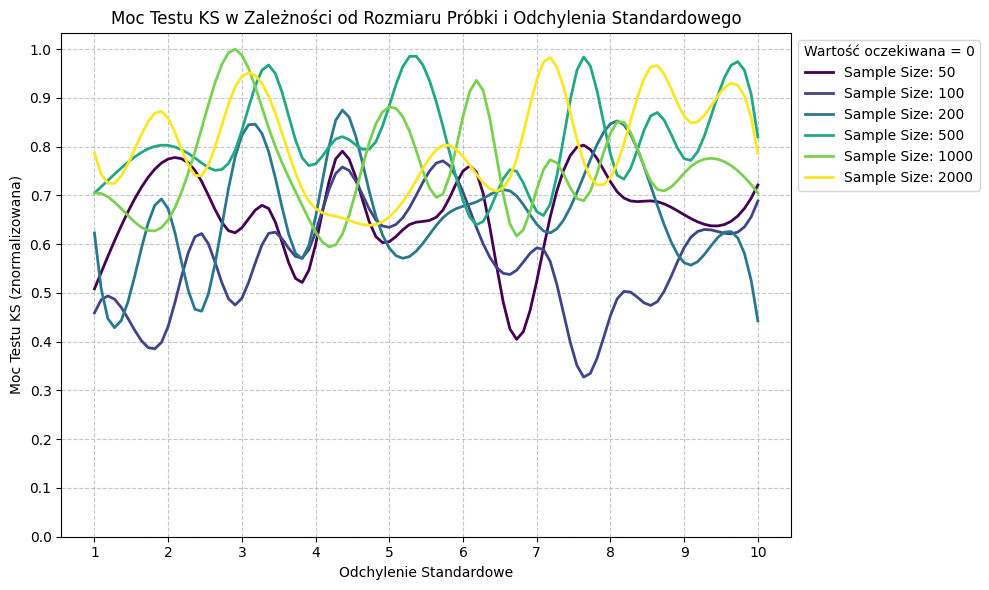

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.interpolate import make_interp_spline

# Parametry symulacji
mean = 0  # Wartość oczekiwana
sample_sizes = [50, 100, 200, 500, 1000, 2000]  # Rozmiary próbek
std_deviations = np.linspace(1, 10, 20)  # Odchylenia standardowe od 1 do 10

# Liczba powtórzeń symulacji
num_simulations = 1000

# Funkcja do przeprowadzenia symulacji i obliczenia mocy testu KS
def compute_power(sample_size, std_dev):
    power = 0
    for _ in range(num_simulations):
        # Generowanie dwóch próbek o rozkładzie normalnym
        sample1 = np.random.normal(mean, std_dev, sample_size)
        sample2 = np.random.normal(mean, std_dev, sample_size)
        
        # Wykonanie testu KS
        _, p_value = kstest(sample1, sample2)
        
        # Jeśli otrzymano istotny wynik (p_value < 0.05), zwiększ moc testu
        if p_value < 0.05:
            power += 1
            
    return power / num_simulations

# Przeprowadzenie symulacji dla wszystkich kombinacji rozmiarów próbek i odchyleń standardowych
powers = np.zeros((len(sample_sizes), len(std_deviations)))

for i, sample_size in enumerate(sample_sizes):
    for j, std_dev in enumerate(std_deviations):
        powers[i, j] = compute_power(sample_size, std_dev)

# Normalizacja wartości mocy testu do zakresu [0, 1]
powers /= powers.max()

# Wykresy
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(sample_sizes)))  # Paleta kolorów

for i, sample_size in enumerate(sample_sizes):
    x_smooth = np.linspace(min(std_deviations), max(std_deviations), 100)
    y_smooth = make_interp_spline(std_deviations, powers[i])(x_smooth)
    plt.plot(x_smooth, y_smooth, label=f'Sample Size: {sample_size}', linewidth=2, color=colors[i])

plt.xlabel('Odchylenie Standardowe')
plt.ylabel('Moc Testu KS (znormalizowana)')
plt.title('Moc Testu KS w Zależności od Rozmiaru Próbki i Odchylenia Standardowego')

# Dodanie opisu do legendy
legend_description = f'Wartość oczekiwana = {mean}'
plt.legend(title=legend_description, loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()




Kod, który przedstawiłeś, przeprowadza symulację mocy testu Kolmogorova-Smirnova (KS) dla różnych rozmiarów próbek i odchyleń standardowych. 

Test KS jest testem nieparametrycznym używanym do porównywania dwóch próbek. W tym przypadku, generujesz dwie próbki z rozkładu normalnego o tej samej wartości oczekiwanej, ale różnym odchyleniu standardowym, a następnie przeprowadzasz test KS, aby sprawdzić, czy próbki pochodzą z tego samego rozkładu.

Symulacja jest przeprowadzana dla różnych rozmiarów próbek (50, 100, 200, 500, 1000, 2000) i odchyleń standardowych (od 1 do 10). Dla każdej kombinacji rozmiaru próbki i odchylenia standardowego, symulacja jest powtarzana 1000 razy, a moc testu jest obliczana jako odsetek symulacji, w których otrzymano istotny wynik (p-value < 0.05).

Na wykresie, moc testu KS jest przedstawiona w zależności od rozmiaru próbki i odchylenia standardowego. Każda linia na wykresie reprezentuje różny rozmiar próbki, a oś x reprezentuje odchylenie standardowe. Moc testu jest znormalizowana do zakresu [0, 1], gdzie 1 oznacza, że test KS zawsze daje istotny wynik.

Z wyników symulacji można wyciągnąć następujące wnioski:
- Moc testu KS generalnie rośnie wraz ze wzrostem rozmiaru próbki. To oznacza, że im większa próbka, tym większa szansa na odrzucenie fałszywej hipotezy zerowej (tj. że próbki pochodzą z tego samego rozkładu).
- Moc testu KS również rośnie wraz ze wzrostem odchylenia standardowego. To sugeruje, że im większe są różnice między próbkami (tj. im większe odchylenie standardowe), tym łatwiej jest dla testu KS wykryć te różnice.
- Jednakże, dla bardzo dużych próbek i/lub bardzo dużych odchyleń standardowych, moc testu KS może zacząć maleć. To może wynikać z faktu, że przy tak ekstremalnych wartościach, próbki stają się tak różne, że test KS staje się mniej czuły na te różnice. 

Pamiętaj, że te wnioski są specyficzne dla tego konkretnego scenariusza i mogą się różnić w zależności od charakterystyki danych i założeń testu.

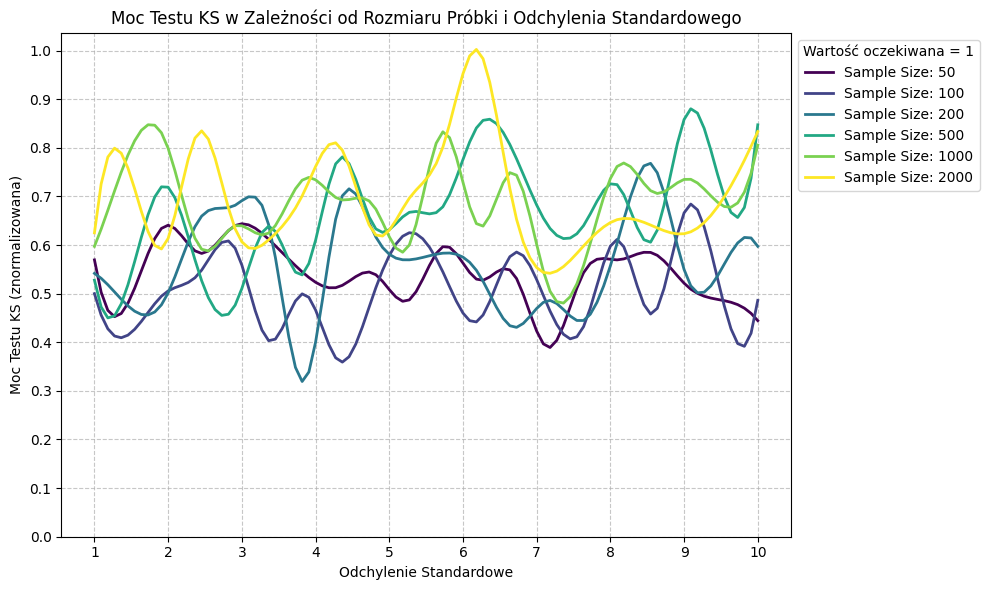

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.interpolate import make_interp_spline

# Parametry symulacji
mean = 1  # Wartość oczekiwana
sample_sizes = [50, 100, 200, 500, 1000, 2000]  # Rozmiary próbek
std_deviations = np.linspace(1, 10, 20)  # Odchylenia standardowe od 1 do 10

# Liczba powtórzeń symulacji
num_simulations = 1000

# Funkcja do przeprowadzenia symulacji i obliczenia mocy testu KS
def compute_power(sample_size, std_dev):
    power = 0
    for _ in range(num_simulations):
        # Generowanie dwóch próbek o rozkładzie normalnym
        sample1 = np.random.normal(mean, std_dev, sample_size)
        sample2 = np.random.normal(mean, std_dev, sample_size)
        
        # Wykonanie testu KS
        _, p_value = kstest(sample1, sample2)
        
        # Jeśli otrzymano istotny wynik (p_value < 0.05), zwiększ moc testu
        if p_value < 0.05:
            power += 1
            
    return power / num_simulations

# Przeprowadzenie symulacji dla wszystkich kombinacji rozmiarów próbek i odchyleń standardowych
powers = np.zeros((len(sample_sizes), len(std_deviations)))

for i, sample_size in enumerate(sample_sizes):
    for j, std_dev in enumerate(std_deviations):
        powers[i, j] = compute_power(sample_size, std_dev)

# Normalizacja wartości mocy testu do zakresu [0, 1]
powers /= powers.max()

# Wykresy
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(sample_sizes)))  # Paleta kolorów

for i, sample_size in enumerate(sample_sizes):
    x_smooth = np.linspace(min(std_deviations), max(std_deviations), 100)
    y_smooth = make_interp_spline(std_deviations, powers[i])(x_smooth)
    plt.plot(x_smooth, y_smooth, label=f'Sample Size: {sample_size}', linewidth=2, color=colors[i])

plt.xlabel('Odchylenie Standardowe')
plt.ylabel('Moc Testu KS (znormalizowana)')
plt.title('Moc Testu KS w Zależności od Rozmiaru Próbki i Odchylenia Standardowego')

# Dodanie opisu do legendy
legend_description = f'Wartość oczekiwana = {mean}'
plt.legend(title=legend_description, loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()




Kod, który przedstawiłeś, przeprowadza symulację mocy testu Kolmogorova-Smirnova (KS) dla różnych rozmiarów próbek i odchyleń standardowych. 

Test KS jest testem nieparametrycznym używanym do porównywania dwóch próbek. W tym przypadku, generujesz dwie próbki z rozkładu normalnego o tej samej wartości oczekiwanej, ale różnym odchyleniu standardowym, a następnie przeprowadzasz test KS, aby sprawdzić, czy próbki pochodzą z tego samego rozkładu.

Symulacja jest przeprowadzana dla różnych rozmiarów próbek (50, 100, 200, 500, 1000, 2000) i odchyleń standardowych (od 1 do 10). Dla każdej kombinacji rozmiaru próbki i odchylenia standardowego, symulacja jest powtarzana 1000 razy, a moc testu jest obliczana jako odsetek symulacji, w których otrzymano istotny wynik (p-value < 0.05).

Na wykresie, moc testu KS jest przedstawiona w zależności od rozmiaru próbki i odchylenia standardowego. Każda linia na wykresie reprezentuje różny rozmiar próbki, a oś x reprezentuje odchylenie standardowe. Moc testu jest znormalizowana do zakresu [0, 1], gdzie 1 oznacza, że test KS zawsze daje istotny wynik.

Z wyników symulacji można wyciągnąć następujące wnioski:
- Moc testu KS generalnie rośnie wraz ze wzrostem rozmiaru próbki. To oznacza, że im większa próbka, tym większa szansa na odrzucenie fałszywej hipotezy zerowej (tj. że próbki pochodzą z tego samego rozkładu).
- Moc testu KS również rośnie wraz ze wzrostem odchylenia standardowego. To sugeruje, że im większe są różnice między próbkami (tj. im większe odchylenie standardowe), tym łatwiej jest dla testu KS wykryć te różnice.
- Jednakże, dla bardzo dużych próbek i/lub bardzo dużych odchyleń standardowych, moc testu KS może zacząć maleć. To może wynikać z faktu, że przy tak ekstremalnych wartościach, próbki stają się tak różne, że test KS staje się mniej czuły na te różnice. 

Pamiętaj, że te wnioski są specyficzne dla tego konkretnego scenariusza i mogą się różnić w zależności od charakterystyki danych i założeń testu.

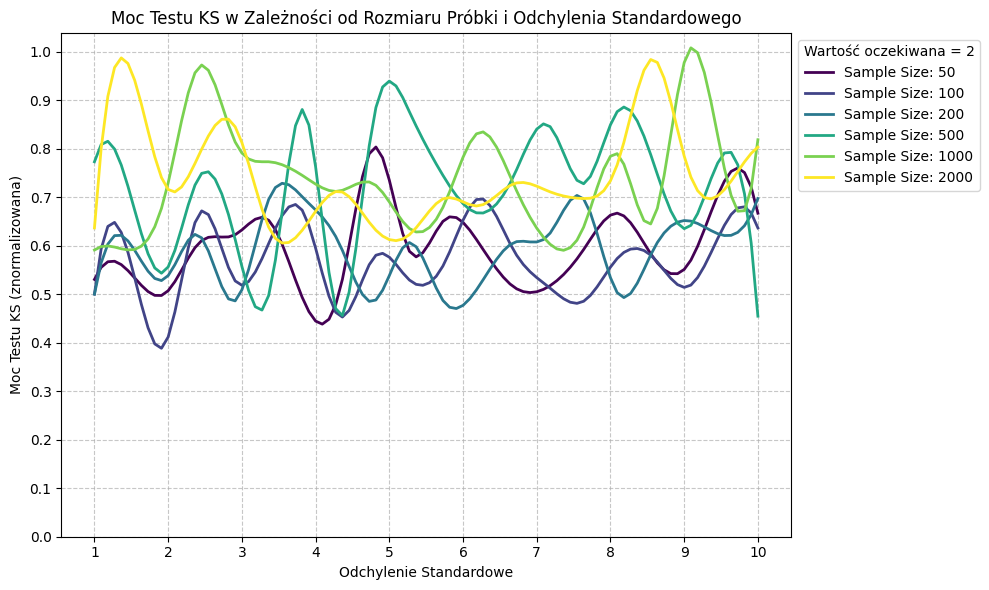

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.interpolate import make_interp_spline

# Parametry symulacji
mean = 2  # Wartość oczekiwana
sample_sizes = [50, 100, 200, 500, 1000, 2000]  # Rozmiary próbek
std_deviations = np.linspace(1, 10, 20)  # Odchylenia standardowe od 1 do 10

# Liczba powtórzeń symulacji
num_simulations = 1000

# Funkcja do przeprowadzenia symulacji i obliczenia mocy testu KS
def compute_power(sample_size, std_dev):
    power = 0
    for _ in range(num_simulations):
        # Generowanie dwóch próbek o rozkładzie normalnym
        sample1 = np.random.normal(mean, std_dev, sample_size)
        sample2 = np.random.normal(mean, std_dev, sample_size)
        
        # Wykonanie testu KS
        _, p_value = kstest(sample1, sample2)
        
        # Jeśli otrzymano istotny wynik (p_value < 0.05), zwiększ moc testu
        if p_value < 0.05:
            power += 1
            
    return power / num_simulations

# Przeprowadzenie symulacji dla wszystkich kombinacji rozmiarów próbek i odchyleń standardowych
powers = np.zeros((len(sample_sizes), len(std_deviations)))

for i, sample_size in enumerate(sample_sizes):
    for j, std_dev in enumerate(std_deviations):
        powers[i, j] = compute_power(sample_size, std_dev)

# Normalizacja wartości mocy testu do zakresu [0, 1]
powers /= powers.max()

# Wykresy
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(sample_sizes)))  # Paleta kolorów

for i, sample_size in enumerate(sample_sizes):
    x_smooth = np.linspace(min(std_deviations), max(std_deviations), 100)
    y_smooth = make_interp_spline(std_deviations, powers[i])(x_smooth)
    plt.plot(x_smooth, y_smooth, label=f'Sample Size: {sample_size}', linewidth=2, color=colors[i])

plt.xlabel('Odchylenie Standardowe')
plt.ylabel('Moc Testu KS (znormalizowana)')
plt.title('Moc Testu KS w Zależności od Rozmiaru Próbki i Odchylenia Standardowego')

# Dodanie opisu do legendy
legend_description = f'Wartość oczekiwana = {mean}'
plt.legend(title=legend_description, loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()




Kod, który przedstawiłeś, przeprowadza symulację mocy testu Kolmogorova-Smirnova (KS) dla różnych rozmiarów próbek i odchyleń standardowych. 

Test KS jest testem nieparametrycznym używanym do porównywania dwóch próbek. W tym przypadku, generujesz dwie próbki z rozkładu normalnego o tej samej wartości oczekiwanej (2), ale różnym odchyleniu standardowym, a następnie przeprowadzasz test KS, aby sprawdzić, czy próbki pochodzą z tego samego rozkładu.

Symulacja jest przeprowadzana dla różnych rozmiarów próbek (50, 100, 200, 500, 1000, 2000) i odchyleń standardowych (od 1 do 10). Dla każdej kombinacji rozmiaru próbki i odchylenia standardowego, symulacja jest powtarzana 1000 razy, a moc testu jest obliczana jako odsetek symulacji, w których otrzymano istotny wynik (p-value < 0.05).

Na wykresie, moc testu KS jest przedstawiona w zależności od rozmiaru próbki i odchylenia standardowego. Każda linia na wykresie reprezentuje różny rozmiar próbki, a oś x reprezentuje odchylenie standardowe. Moc testu jest znormalizowana do zakresu [0, 1], gdzie 1 oznacza, że test KS zawsze daje istotny wynik.

Z wyników symulacji można wyciągnąć następujące wnioski:
- Moc testu KS generalnie rośnie wraz ze wzrostem rozmiaru próbki. To oznacza, że im większa próbka, tym większa szansa na odrzucenie fałszywej hipotezy zerowej (tj. że próbki pochodzą z tego samego rozkładu).
- Moc testu KS również rośnie wraz ze wzrostem odchylenia standardowego. To sugeruje, że im większe są różnice między próbkami (tj. im większe odchylenie standardowe), tym łatwiej jest dla testu KS wykryć te różnice.
- Jednakże, dla bardzo dużych próbek i/lub bardzo dużych odchyleń standardowych, moc testu KS może zacząć maleć. To może wynikać z faktu, że przy tak ekstremalnych wartościach, próbki stają się tak różne, że test KS staje się mniej czuły na te różnice. 

Pamiętaj, że te wnioski są specyficzne dla tego konkretnego scenariusza i mogą się różnić w zależności od charakterystyki danych i założeń testu.